In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

In [42]:
# import sample image

#image_path = './images/map0001.png'
image_path = './images/map005_small002.png'


# Open the image
image = Image.open(image_path)

# Convert the image to grayscale (if it's not already)
image_bw = image.convert('L')

# Convert the image to a numpy array
image_array = np.array(image_bw)

# Now, image_array is a numpy array representation of your image
#import sys
#np.set_printoptions(threshold=sys.maxsize)
print(image_array)


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


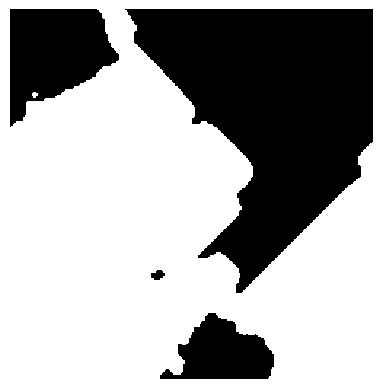

In [43]:
def show_image_array(image_array):
    plt.imshow(image_array, cmap='gray', interpolation='none')
    plt.axis('off')  # Turn off axis numbers
    plt.show()

show_image_array(image_array)

In [44]:
def find_boundary_pixels(image_array):
    """Find boundary pixels in the binary image."""
    boundary_pixels = []
    rows, cols = image_array.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # A boundary pixel has at least one neighbor with a different value
            if np.any(image_array[i-1:i+2, j-1:j+2] != image_array[i, j]):
                boundary_pixels.append((i, j))
    return boundary_pixels

boundary_pixels = find_boundary_pixels(image_array)

In [45]:
print(boundary_pixels)

[(1, 59), (1, 60), (1, 61), (1, 62), (1, 78), (1, 79), (1, 80), (1, 81), (2, 60), (2, 61), (2, 62), (2, 63), (2, 79), (2, 80), (2, 81), (3, 61), (3, 62), (3, 63), (3, 80), (3, 81), (3, 82), (4, 62), (4, 63), (4, 80), (4, 81), (4, 82), (4, 83), (5, 62), (5, 63), (5, 64), (5, 81), (5, 82), (5, 83), (6, 62), (6, 63), (6, 64), (6, 65), (6, 82), (6, 83), (6, 84), (7, 63), (7, 64), (7, 65), (7, 82), (7, 83), (7, 84), (7, 85), (8, 64), (8, 65), (8, 83), (8, 84), (8, 85), (9, 64), (9, 65), (9, 84), (9, 85), (9, 86), (10, 64), (10, 65), (10, 84), (10, 85), (10, 86), (10, 87), (11, 64), (11, 65), (11, 85), (11, 86), (11, 87), (12, 64), (12, 65), (12, 86), (12, 87), (13, 64), (13, 65), (13, 86), (13, 87), (14, 64), (14, 65), (14, 85), (14, 86), (14, 87), (15, 64), (15, 65), (15, 66), (15, 84), (15, 85), (15, 86), (15, 87), (16, 64), (16, 65), (16, 66), (16, 67), (16, 84), (16, 85), (16, 86), (17, 65), (17, 66), (17, 67), (17, 84), (17, 85), (18, 66), (18, 67), (18, 84), (18, 85), (19, 66), (19, 6

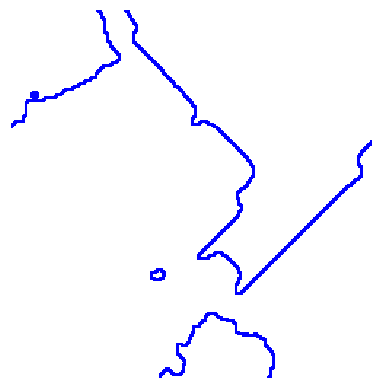

In [46]:

def display_edge_pixels(boundary_pixels):
    # Create a new image with white background
    new_image = np.ones(image_array.shape + (3,), dtype=np.uint8) * 255  # White background

    # Set boundary pixels to blue
    for i, j in boundary_pixels:
        new_image[i, j] = [0, 0, 255]  # Blue color

    # Display the image
    plt.imshow(new_image, interpolation='none')
    plt.axis('off')
    plt.show()

display_edge_pixels(boundary_pixels)

In [38]:
print(random.random())

0.7292108469287879


In [47]:
def add_randomness_to_boundaries(image_array, boundary_pixels, randomness_factor=0.5):
    """Add randomness to the boundaries."""
    for i, j in boundary_pixels:
        if random.random() < randomness_factor:
            if(image_array[i, j]) == 255:
                image_array[i, j] = 0
            else:
                image_array[i, j] = 255
                

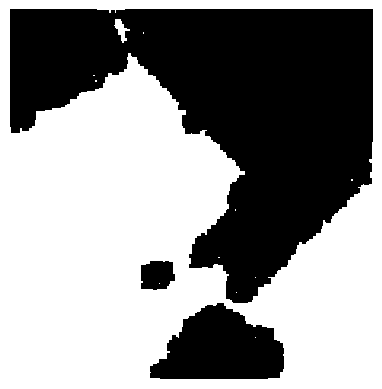

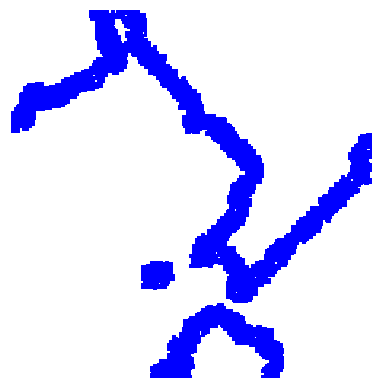

In [48]:


NUMBER_OF_RANDOMNESS_ADDS = 6

for i in range(0,NUMBER_OF_RANDOMNESS_ADDS):
    add_randomness_to_boundaries(image_array, boundary_pixels)
    boundary_pixels = find_boundary_pixels(image_array)






#combine boundary pixels to the image array

for coord in boundary_pixels:
    image_array[coord[0], coord[1]] = 0

#image_array = make_boundary_wavy(image_array, boundary_pixels)
show_image_array(image_array)
display_edge_pixels(boundary_pixels)

